In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

In [ ]:
df = pd.read_csv('/content/processed_life data_final.csv')
df.head(5)

,Country,Region,Year,Infant_deaths,Under_five_deaths,Adult_mortality,Alcohol_consumption,Hepatitis_B,Measles,BMI,...,Population_mln,Thinness_ten_nineteen_years,Thinness_five_nine_years,Schooling,Economy_status_Developed,Economy_status_Developing,Life_expectancy,log_GDP_per_capita,log_Population_mln,log_Adult_mortality
0,Afghanistan,Asia,2000.0,90.5,129.2,310.8305,0.02,62.0,12.0,22.0,...,20.78,2.3,2.5,2.2,0.0,1.0,55.8,4.997212,3.033991,5.739248
1,Afghanistan,Asia,2001.0,87.9,125.2,304.8580,0.02,63.0,13.0,22.0,...,21.61,2.1,2.4,2.2,0.0,1.0,56.3,5.093750,3.073156,5.719846
2,Afghanistan,Asia,2002.0,85.3,121.1,298.8855,0.02,64.0,14.0,22.0,...,22.60,19.9,2.2,2.3,0.0,1.0,56.8,5.768321,3.117950,5.700061
3,Afghanistan,Asia,2003.0,82.7,116.9,292.0365,0.02,65.0,15.0,22.0,...,23.68,19.7,19.9,2.4,0.0,1.0,57.3,5.805135,3.164631,5.676879
4,Afghanistan,Asia,2004.0,80.0,112.6,285.1880,0.02,67.0,16.0,22.0,...,24.73,19.5,19.7,2.5,0.0,1.0,57.8,5.777652,3.208017,5.653149


In [ ]:
correlation, p_value = stats.pearsonr(df['Infant_deaths'], df['Life_expectancy'])

lope, intercept, r_value, p_value, std_err = stats.linregress(df['Infant_deaths'], df['Life_expectancy'])
print(f"회귀분석 결과: R² = {r_value**2}, p-value = {p_value}")

회귀분석 결과: R² = 0.8472081468066995, p-value = 0.0


In [ ]:
summary_stats = df.groupby('Country')[['Infant_deaths', 'Life_expectancy']].agg(['mean', 'std'])
print(summary_stats)

                    Infant_deaths            Life_expectancy          
                             mean        std            mean       std
Country                                                               
Afghanistan              71.08125  12.057154        59.65625  2.470349
Albania                  15.25625   5.271302        75.95000  1.294089
Algeria                  26.75625   4.359047        73.78750  1.774213
Angola                   88.76875  21.515040        52.82500  4.383530
Antigua and Barbuda       9.47500   2.029943        75.35000  0.800833
...                           ...        ...             ...       ...
Venezuela, RB            15.85000   1.225833        72.79375  0.304344
Vietnam                  19.50000   1.865476        74.33125  0.703059
Yemen, Rep.              52.44375   8.135762        64.16250  1.858987
Zambia                   60.58125  14.327513        52.33125  6.053398
Zimbabwe                 50.16875   3.962107        48.66250  5.994984

[180 

In [ ]:
correlation, p_value = stats.pearsonr(df['Infant_deaths'], df['Life_expectancy'])
print(f"상관계수: {correlation:.4f}")
print(f"p-value: {p_value:.4f}")

상관계수: -0.9204
p-value: 0.0000


In [ ]:
df['Infant_death_Group'] = pd.qcut(df['Infant_deaths'], q=3, labels=['Low', 'Medium', 'High'])
life_expectancy_groups = [
    df[df['Infant_death_Group'] == 'Low']['Life_expectancy'],
    df[df['Infant_death_Group'] == 'Medium']['Life_expectancy'],
    df[df['Infant_death_Group'] == 'High']['Life_expectancy']
]

f_statistic, p_value = stats.f_oneway(*life_expectancy_groups)
print("\n분산분석(ANOVA) 결과:")
print(f"F-통계량: {f_statistic:.4f}")
print(f"p-value: {p_value:.4f}")



분산분석(ANOVA) 결과:
F-통계량: 4647.4967
p-value: 0.0000


Text(0, 0.5, 'Life expectancy')

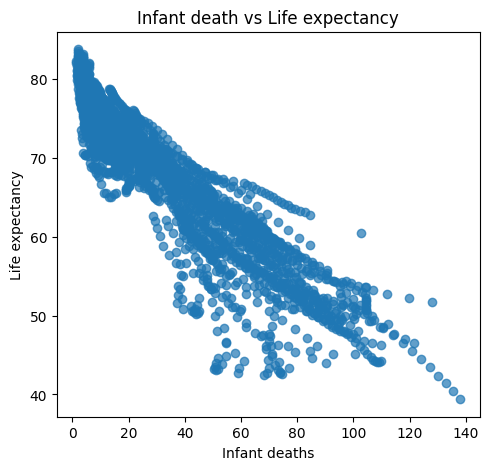

In [ ]:
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.scatter(df['Infant_deaths'], df['Life_expectancy'], alpha=0.7)
plt.title('Infant death vs Life expectancy')
plt.xlabel('Infant deaths')
plt.ylabel('Life expectancy')


In [ ]:
correlation, p_value = stats.pearsonr(df['Adult_mortality'], df['Life_expectancy'])

lope, intercept, r_value, p_value, std_err = stats.linregress(df['Adult_mortality'], df['Life_expectancy'])
print(f"회귀분석 결과: R² = {r_value**2}, p-value = {p_value}")

회귀분석 결과: R² = 0.8940842602760107, p-value = 0.0


In [ ]:
summary_stats = df.groupby('Country')[['Adult_mortality', 'Life_expectancy']].agg(['mean', 'std'])
print(summary_stats)

                    Adult_mortality             Life_expectancy          
                               mean         std            mean       std
Country                                                                  
Afghanistan              265.804969   26.872148        59.65625  2.470349
Albania                   83.132969    5.057724        75.95000  1.294089
Algeria                  113.439281   14.571541        73.78750  1.774213
Angola                   297.844063   43.355143        52.82500  4.383530
Antigua and Barbuda      142.478813    8.386654        75.35000  0.800833
...                             ...         ...             ...       ...
Venezuela, RB            151.056156    5.777583        72.79375  0.304344
Vietnam                  133.054406    4.593225        74.33125  0.703059
Yemen, Rep.              239.653937   10.416061        64.16250  1.858987
Zambia                   452.761219  111.966470        52.33125  6.053398
Zimbabwe                 572.974312  1

In [ ]:
correlation, p_value = stats.pearsonr(df['Adult_mortality'], df['Life_expectancy'])
print(f"상관계수: {correlation:.4f}")
print(f"p-value: {p_value:.4f}")

상관계수: -0.9456
p-value: 0.0000


In [ ]:
df['Adult_death_Group'] = pd.qcut(df['Adult_mortality'], q=3, labels=['Low', 'Medium', 'High'])
life_expectancy_groups = [
    df[df['Adult_death_Group'] == 'Low']['Life_expectancy'],
    df[df['Adult_death_Group'] == 'Medium']['Life_expectancy'],
    df[df['Adult_death_Group'] == 'High']['Life_expectancy']
]

f_statistic, p_value = stats.f_oneway(*life_expectancy_groups)
print("검정통계량(t):", f_stat, ", p-value:", p_value)


검정통계량(t): 1018.7105598886709 , p-value: 0.0


/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 44592 (\N{HANGUL SYLLABLE GI}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 45824 (\N{HANGUL SYLLABLE DAE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 49688 (\N{HANGUL SYLLABLE SU}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 47749 (\N{HANGUL SYLLABLE MYEONG}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 44284 (\N{HANGUL SYLLABLE GWA}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr

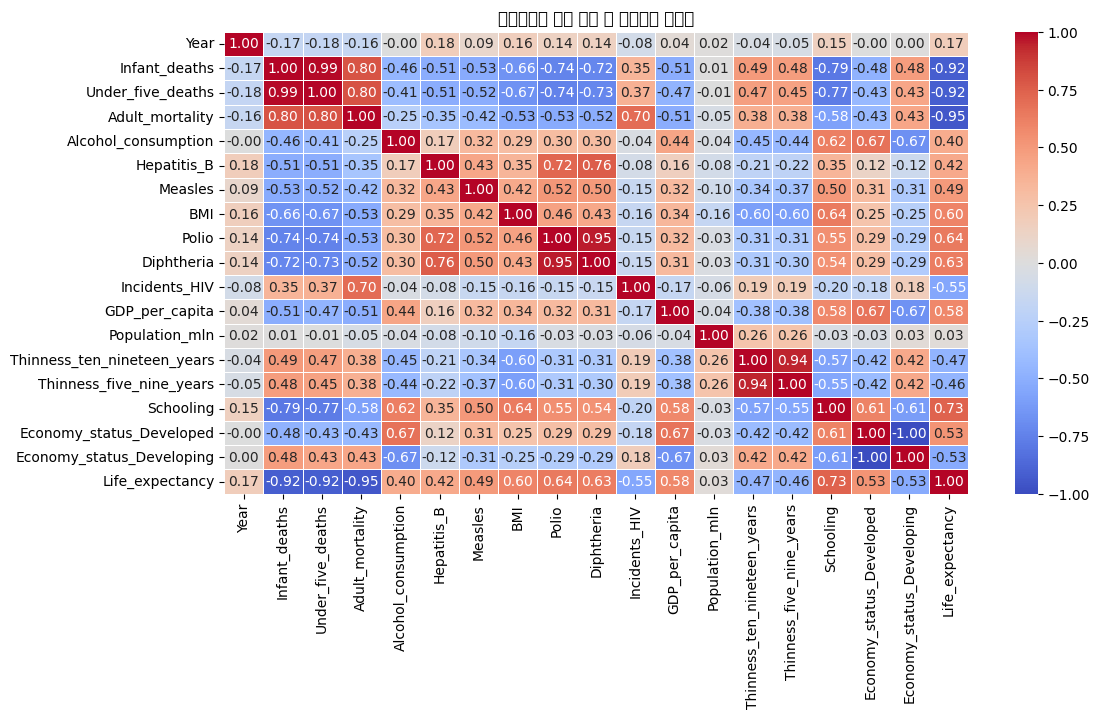

In [ ]:
numerical_df = df.select_dtypes(include=np.number)

correlation_matrix = numerical_df.corr()

plt.figure(figsize=(12, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5, fmt=".2f")
plt.title('기대수명과 다른 변수 간 상관관계 히트맵')
plt.show()

In [ ]:
#검증
from scipy import stats as st

#t 분포 검증
t_stat, p_val = st.ttest_ind(df['Adult_mortality'],df['Life_expectancy'] )
print("검정통계량(t):", t_stat, ", p-value:", p_val)

alpha = 0.05
if p_val < alpha:
    print("→ 귀무가설 기각 (개선 효과 유의미)")
else:
    print("→ 귀무가설 채택 (개선 효과 통계적으로 확인 어려움)")

검정통계량(t): 57.15334702773108 , p-value: 0.0
→ 귀무가설 기각 (개선 효과 유의미)


In [ ]:
#검증
from scipy import stats as st

#t 분포 검증
t_stat, p_val = st.ttest_ind(df['Infant_deaths'],df['Life_expectancy'] )
print("검정통계량(t):", t_stat, ", p-value:", p_val)

alpha = 0.05
if p_val < alpha:
    print("→ 귀무가설 기각 (개선 효과 유의미)")
else:
    print("→ 귀무가설 채택 (개선 효과 통계적으로 확인 어려움)")

검정통계량(t): -71.37019792851183 , p-value: 0.0
→ 귀무가설 기각 (개선 효과 유의미)


In [ ]:
from scipy.stats import f_oneway

# 일원분산분석
f_stat, p_value = f_oneway(df['Polio'],df['Diphtheria'],df['Hepatitis_B'],df['Life_expectancy'])


print("검정통계량(t):", f_stat, ", p-value:", p_value)

alpha = 0.05
if p_val < alpha:
    print("→ 귀무가설 기각 (개선 효과 유의미)")
else:
    print("→ 귀무가설 채택 (개선 효과 통계적으로 확인 어려움)")


검정통계량(t): 1019.5290353576669 , p-value: 0.0
→ 귀무가설 기각 (개선 효과 유의미)


In [ ]:
#검증
from scipy import stats as st

#t 분포 검증
t_stat, p_val = st.ttest_ind(df['Alcohol_consumption'],df['Life_expectancy'] )
print("검정통계량(t):", t_stat, ", p-value:", p_val)

alpha = 0.05
if p_val < alpha:
    print("→ 귀무가설 기각 (개선 효과 유의미)")
else:
    print("→ 귀무가설 채택 (개선 효과 통계적으로 확인 어려움)")

검정통계량(t): -336.30087362834934 , p-value: 0.0
→ 귀무가설 기각 (개선 효과 유의미)


In [ ]:
df['Population_mln_log'] = np.log(df['Population_mln'])
df['GDP_per_capita_log'] = np.log(df['GDP_per_capita'])

In [ ]:
#검증
from scipy import stats as st

#t 분포 검증
t_stat, p_val = st.ttest_ind(df['GDP_per_capita'],df['Life_expectancy'] )
print("검정통계량(t):", t_stat, ", p-value:", p_val)

alpha = 0.05
if p_val < alpha:
    print("→ 귀무가설 기각 (개선 효과 유의미)")
else:
    print("→ 귀무가설 채택 (개선 효과 통계적으로 확인 어려움)")

검정통계량(t): 36.57741648052452 , p-value: 1.4256279037313109e-263
→ 귀무가설 기각 (개선 효과 유의미)


In [ ]:
#검증
from scipy import stats as st

#t 분포 검증
t_stat, p_val = st.ttest_ind(df['Schooling'],df['Life_expectancy'] )
print("검정통계량(t):", t_stat, ", p-value:", p_val)

alpha = 0.05
if p_val < alpha:
    print("→ 귀무가설 기각 (개선 효과 유의미)")
else:
    print("→ 귀무가설 채택 (개선 효과 통계적으로 확인 어려움)")

검정통계량(t): -330.7810489317314 , p-value: 0.0
→ 귀무가설 기각 (개선 효과 유의미)


In [ ]:
#검증
from scipy import stats as st

#t 분포 검증
t_stat, p_val = st.ttest_ind(df['Population_mln'],df['Life_expectancy'] )
print("검정통계량(t):", t_stat, ", p-value:", p_val)

alpha = 0.05
if p_val < alpha:
    print("→ 귀무가설 기각 (개선 효과 유의미)")
else:
    print("→ 귀무가설 채택 (개선 효과 통계적으로 확인 어려움)")

검정통계량(t): -12.65434692682976 , p-value: 3.201646396592262e-36
→ 귀무가설 기각 (개선 효과 유의미)


In [ ]:
# 선진국과 개발도상국 그룹으로 나누기
advanced_countries = df[df['Economy_status_Developed'] == 1]['Life_expectancy']
developing_countries = df[df['Economy_status_Developed'] == 0]['Life_expectancy']

# 두 그룹의 기대수명 평균 출력
print("선진국 기대수명 평균:", advanced_countries.mean())
print("개발도상국 기대수명 평균:", developing_countries.mean())

# 두 그룹 간의 t-검정 수행
t_stat, p_value = stats.ttest_ind(advanced_countries, developing_countries)

# t-검정 결과 출력
print("\nT-statistic:", t_stat)
print("P-value:", p_value)

# 결과 해석
if p_value < 0.05:
    print("\n귀무가설을 기각합니다. 선진국의 기대수명이 개발도상국보다 유의미하게 높습니다.")
else:
    print("\n귀무가설을 기각할 수 없습니다. 두 그룹 간 기대수명에 유의미한 차이가 없습니다.")


선진국 기대수명 평균: 78.53289473684211
개발도상국 기대수명 평균: 66.34172535211268

T-statistic: 33.40435224052806
P-value: 4.760614136838302e-207

귀무가설을 기각합니다. 선진국의 기대수명이 개발도상국보다 유의미하게 높습니다.


In [ ]:
#검증
from scipy import stats as st

#t 분포 검증
t_stat, p_val = st.ttest_ind(df['BMI'],df['Life_expectancy'] )
print("검정통계량(t):", t_stat, ", p-value:", p_val)

alpha = 0.05
if p_val < alpha:
    print("→ 귀무가설 기각 (개선 효과 유의미)")
else:
    print("→ 귀무가설 채택 (개선 효과 통계적으로 확인 어려움)")

검정통계량(t): -243.45090851626597 , p-value: 0.0
→ 귀무가설 기각 (개선 효과 유의미)


In [ ]:
# 비만과 정상 그룹으로 나누기
normal = df[df['BMI'] <= 25]['Life_expectancy']
obesity = df[df['BMI'] >25 ]['Life_expectancy']

# 두 그룹의 기대수명 평균 출력
print("정상 평균:", normal.mean())
print("비만 평균:", obesity.mean())

# 두 그룹 간의 t-검정 수행
t_stat, p_value = stats.ttest_ind(normal, obesity)

# t-검정 결과 출력
print("\nT-statistic:", t_stat)
print("P-value:", p_value)

# 결과 해석
if p_value < 0.05:
    print("\n귀무가설을 기각합니다.")
else:
    print("\n귀무가설을 기각할 수 없습니다.")


정상 평균: 61.59965957446809
비만 평균: 73.95706744868035

T-statistic: -45.30778251845308
P-value: 0.0

귀무가설을 기각합니다.


# 전처리

In [ ]:
df['log_gdp'] = np.log(df['GDP_per_capita'])
df['total_death'] = df['Adult_mortality'] +df['Under_five_deaths']
df.head(5)

,Country,Region,Year,Infant_deaths,Under_five_deaths,Adult_mortality,Alcohol_consumption,Hepatitis_B,Measles,BMI,...,Schooling,Economy_status_Developed,Economy_status_Developing,Life_expectancy,Infant_death_Group,Adult_death_Group,Population_mln_log,GDP_per_capita_log,log_gdp,total_death
0,Afghanistan,Asia,2000,90.5,129.2,310.8305,0.02,62,12,21.7,...,2.2,0,1,55.8,High,High,3.033991,4.997212,4.997212,440.0305
1,Afghanistan,Asia,2001,87.9,125.2,304.8580,0.02,63,13,21.8,...,2.2,0,1,56.3,High,High,3.073156,5.093750,5.093750,430.0580
2,Afghanistan,Asia,2002,85.3,121.1,298.8855,0.02,64,14,21.9,...,2.3,0,1,56.8,High,High,3.117950,5.768321,5.768321,419.9855
3,Afghanistan,Asia,2003,82.7,116.9,292.0365,0.02,65,15,22.0,...,2.4,0,1,57.3,High,High,3.164631,5.805135,5.805135,408.9365
4,Afghanistan,Asia,2004,80.0,112.6,285.1880,0.02,67,16,22.1,...,2.5,0,1,57.8,High,High,3.208017,5.777652,5.777652,397.7880


In [ ]:
df.to_csv('/content/Life_r.csv', index=False)

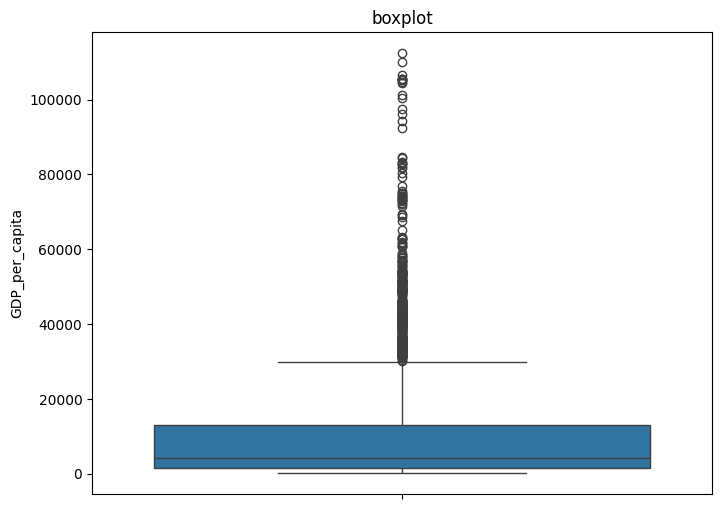

In [ ]:
plt.figure(figsize=(8, 6))
sns.boxplot(data=df['GDP_per_capita'])
plt.title('boxplot')
plt.show()


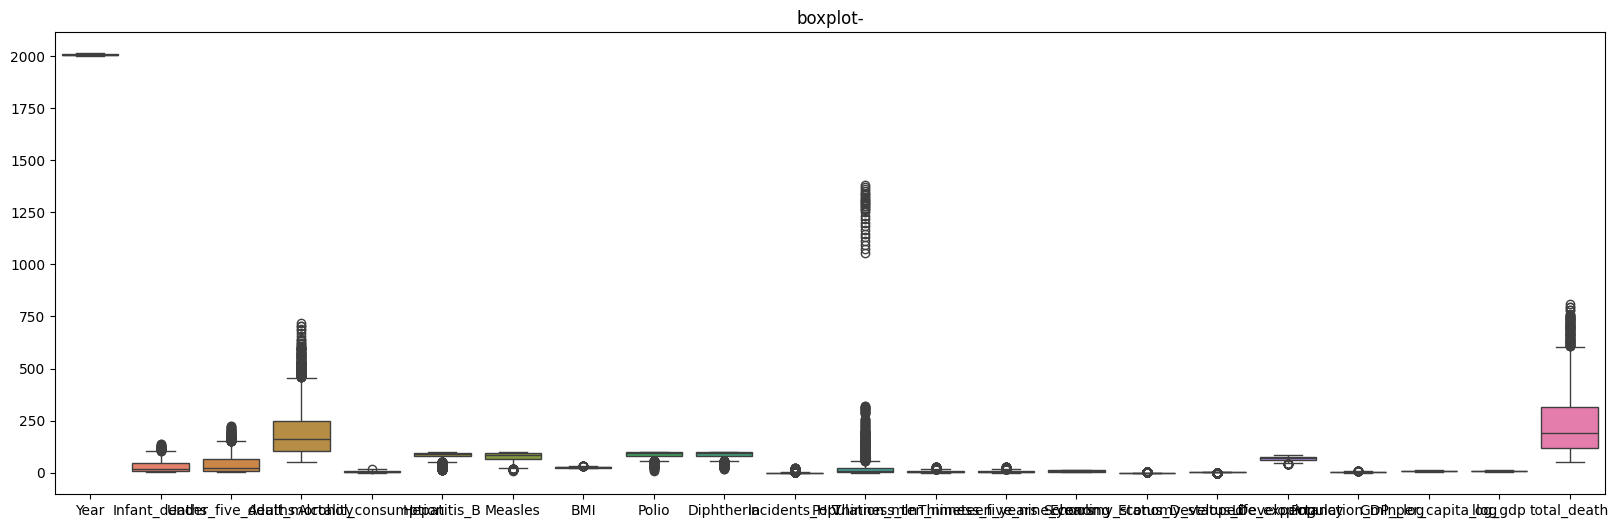

In [ ]:
plt.figure(figsize=(20, 6))
sns.boxplot(data=df.drop('GDP_per_capita', axis=1))
plt.title('boxplot-')
plt.show()

In [ ]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
scaler = MinMaxScaler()
df[['Adult_mortality', 'Population_mln']] = scaler.fit_transform(df[['Adult_mortality', 'Population_mln']])
df

,Country,Region,Year,Infant_deaths,Under_five_deaths,Adult_mortality,Alcohol_consumption,Hepatitis_B,Measles,BMI,...,Schooling,Economy_status_Developed,Economy_status_Developing,Life_expectancy,Infant_death_Group,Adult_death_Group,Population_mln_log,GDP_per_capita_log,log_gdp,total_death
0,Afghanistan,Asia,2000,90.5,129.2,0.390232,0.02,62,12,21.7,...,2.2,0,1,55.8,High,High,3.033991,4.997212,4.997212,440.0305
1,Afghanistan,Asia,2001,87.9,125.2,0.381318,0.02,63,13,21.8,...,2.2,0,1,56.3,High,High,3.073156,5.093750,5.093750,430.0580
2,Afghanistan,Asia,2002,85.3,121.1,0.372403,0.02,64,14,21.9,...,2.3,0,1,56.8,High,High,3.117950,5.768321,5.768321,419.9855
3,Afghanistan,Asia,2003,82.7,116.9,0.362181,0.02,65,15,22.0,...,2.4,0,1,57.3,High,High,3.164631,5.805135,5.805135,408.9365
4,Afghanistan,Asia,2004,80.0,112.6,0.351959,0.02,67,16,22.1,...,2.5,0,1,57.8,High,High,3.208017,5.777652,5.777652,397.7880
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2875,Zimbabwe,Africa,2011,50.8,80.8,0.622232,3.91,94,64,23.7,...,7.3,0,1,52.9,High,High,2.556452,7.130099,7.130099,547.0650
2876,Zimbabwe,Africa,2012,46.5,72.2,0.558315,3.93,97,64,23.7,...,7.9,0,1,55.0,High,High,2.574138,7.266827,7.266827,495.6420
2877,Zimbabwe,Africa,2013,44.8,66.3,0.530801,4.11,95,64,23.7,...,8.0,0,1,56.9,High,High,2.591516,7.268920,7.268920,471.3080
2878,Zimbabwe,Africa,2014,42.9,62.7,0.503287,4.22,91,64,23.8,...,8.2,0,1,58.4,High,High,2.609334,7.275172,7.275172,449.2745


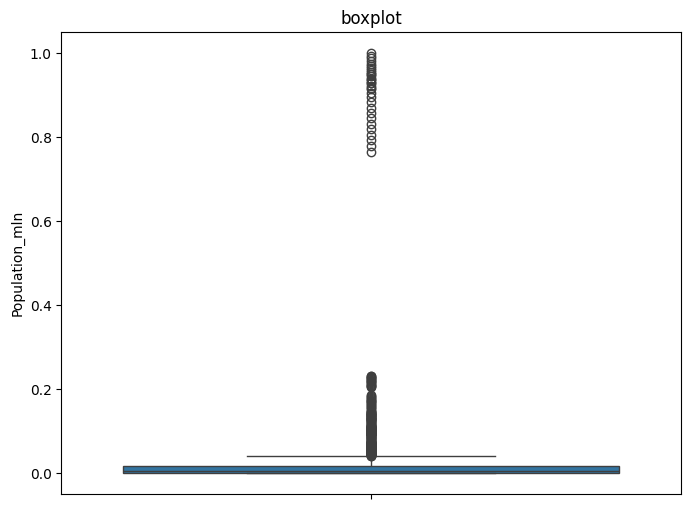

In [ ]:
plt.figure(figsize=(8, 6))
sns.boxplot(data=df['Population_mln'])
plt.title('boxplot')
plt.show()


Mean Squared Error: 1.4070450940919401
R-squared: 0.9841890460612543


<ipython-input-20-5d3b20780894>:42: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "--k" (-> color='k'). The keyword argument will take precedence.
  plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--k', color='red')


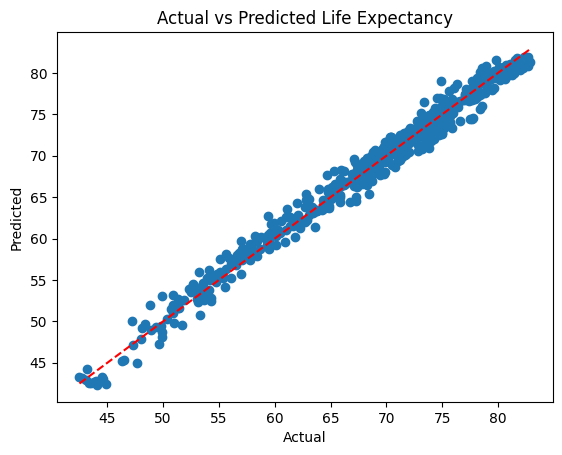

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler


# 필요 없는 열 삭제 (예시로 국가명 제거)
dfa = df.drop(columns=['Country','Region'])


# 특성과 타겟 변수 설정
X = dfa.drop(columns=['Life_expectancy'])
y = dfa['Life_expectancy']

# 데이터 분할 (훈련용 80%, 테스트용 20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 데이터 스케일링 (선형 회귀는 스케일링이 중요)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# 선형 회귀 모델 훈련
model = LinearRegression()
model.fit(X_train, y_train)

# 예측
y_pred = model.predict(X_test)

# 모델 평가
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')

# 예측값과 실제값 시각화
plt.scatter(y_test, y_pred)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--k', color='red')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted Life Expectancy')
plt.show()


Mean Squared Error: 0.28381066666666444
R-squared: 0.9968108219154929


<ipython-input-23-78490805c2b9>:32: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "--k" (-> color='k'). The keyword argument will take precedence.
  plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--k', color='red')


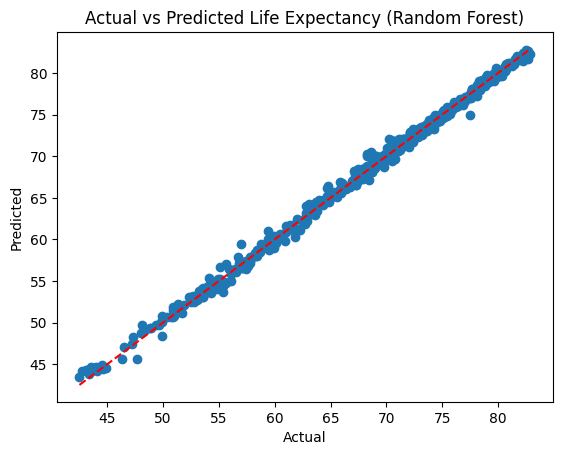

In [ ]:
from sklearn.ensemble import RandomForestRegressor


# 특성과 타겟 변수 설정
X = dfa.drop(columns=['Life_expectancy'])
y = dfa['Life_expectancy']

# 데이터 분할 (훈련용 80%, 테스트용 20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 데이터 스케일링
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# 랜덤 포레스트 모델 훈련
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# 예측
y_pred = rf_model.predict(X_test)

# 모델 평가
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')

# 예측값과 실제값 시각화
plt.scatter(y_test, y_pred)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--k', color='red')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted Life Expectancy (Random Forest)')
plt.show()


Mean Squared Error: 0.7790088364209006
R-squared: 0.9912462842290953


<ipython-input-25-c874ceecbf18>:31: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "--k" (-> color='k'). The keyword argument will take precedence.
  plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--k', color='red')


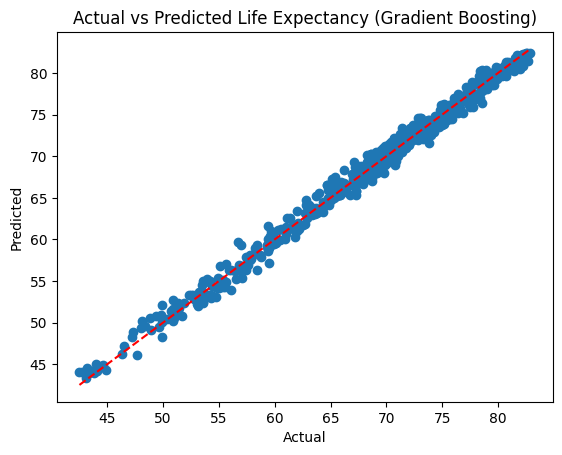

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor

# 특성과 타겟 변수 설정
X = dfa.drop(columns=['Life_expectancy'])
y = dfa['Life_expectancy']

# 데이터 분할 (훈련용 80%, 테스트용 20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 데이터 스케일링
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# 그라디언트 부스팅 모델 훈련
gbm_model = GradientBoostingRegressor(n_estimators=100, random_state=42)
gbm_model.fit(X_train, y_train)

# 예측
y_pred = gbm_model.predict(X_test)

# 모델 평가
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')

# 예측값과 실제값 시각화
plt.scatter(y_test, y_pred)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--k', color='red')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted Life Expectancy (Gradient Boosting)')
plt.show()


Mean Squared Error: 0.26176862068344164
R-squared: 0.997058508201611


<ipython-input-29-f6bf0bba3741>:38: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "--k" (-> color='k'). The keyword argument will take precedence.
  plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--k', color='red')


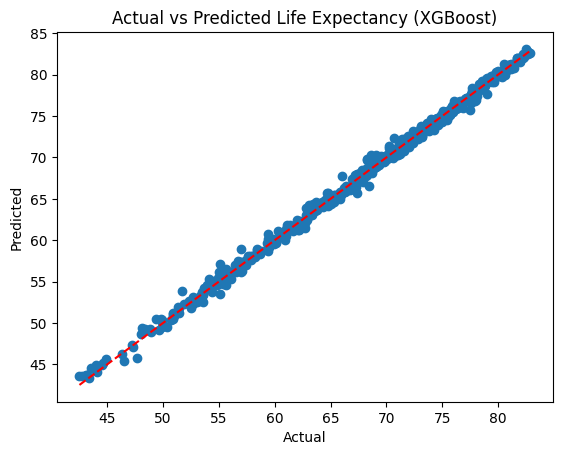

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
import xgboost as xgb


# 특성과 타겟 변수 설정
X = dfa.drop(columns=['Life_expectancy'])
y = dfa['Life_expectancy']

# 데이터 분할 (훈련용 80%, 테스트용 20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 데이터 스케일링
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# XGBoost 모델 훈련
xg_model = xgb.XGBRegressor(n_estimators=100, random_state=42)
xg_model.fit(X_train, y_train)

# 예측
y_pred = xg_model.predict(X_test)

# 모델 평가
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')

# 예측값과 실제값 시각화
plt.scatter(y_test, y_pred)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--k', color='red')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted Life Expectancy (XGBoost)')
plt.show()


In [ ]:
from sklearn.model_selection import GridSearchCV

# 하이퍼파라미터 그리드 설정
param_grid = {
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.2],
    'n_estimators': [50, 100, 150],
    'subsample': [0.8, 0.9, 1.0]
}

# XGBoost 모델
xg_model = xgb.XGBRegressor(random_state=42)

# 그리드 서치 수행
grid_search = GridSearchCV(estimator=xg_model, param_grid=param_grid, cv=3, scoring='neg_mean_squared_error', n_jobs=-1, verbose=2)
grid_search.fit(X_train, y_train)

# 최적의 파라미터 출력
print("Best parameters:", grid_search.best_params_)

# 최적의 모델로 예측
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

# 모델 평가
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')


Fitting 3 folds for each of 81 candidates, totalling 243 fits
Best parameters: {'learning_rate': 0.1, 'max_depth': 7, 'n_estimators': 150, 'subsample': 0.8}
Mean Squared Error: 0.1803705057393182
R-squared: 0.9979731781375543
